## Load Data from CSVs

In [1]:
import unicodecsv

def read_file(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_file('enrollments.csv')



In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

daily_engagement = read_file('daily_engagement.csv')
project_submissions = read_file('project_submissions.csv')
print(daily_engagement[0])
print(project_submissions[0])

OrderedDict([('acct', '0'), ('utc_date', '2015-01-09'), ('num_courses_visited', '1.0'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')])
OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

## Investigating the Data

In [6]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows in each table.
# Number of rows
print(len(enrollments))
print(len(daily_engagement))
print(len(project_submissions))

1640
136240
3642


## Problems in the Data

In [7]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for i in daily_engagement:
    i['account_key'] = i.pop('acct')
print(daily_engagement[0]['account_key'])

0


In [8]:
## Find the total number of unique students in each table.

def unique(data):
    unique_enrollments = set()
    for i in data:
        for key in i:
            if key == 'account_key':
                unique_enrollments.add(i[key])
    return(unique_enrollments)

        
print(len(unique(enrollments)))
print(len(unique(project_submissions)))
print(len(unique(daily_engagement)))

1302
743
1237


## Missing Engagement Records

In [9]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
data = set()
for i in unique(enrollments):
    if i not in unique(daily_engagement):
        data.add(i)
print(len(data))

65


OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])
3


## Checking for More Problem Records

In [10]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

count = 0
for i in enrollments:
    for j in data:
        if i['account_key'] == j and i['join_date'] != i['cancel_date']:
            count += 1
            print(i)
print(count)

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])
3


## Tracking Down the Remaining Problems

In [11]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [12]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [13]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [14]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for i in non_udacity_enrollments:
    if i['days_to_cancel'] == None or i['days_to_cancel'] > 7:
        account_key = i['account_key']
        enrollment_date = i['join_date']
        if account_key not in paid_students or \
        enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date
print(len(paid_students))

995


## Getting Data from First Week

In [15]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [16]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's joint date.


paid_engagement_in_first_week = []
for key, value in paid_students.items():
    for j in non_udacity_engagement:
        if j['account_key'] == key and within_one_week(value, j['utc_date']):
            paid_engagement_in_first_week += [j]
            
print(paid_engagement_in_first_week[0])


OrderedDict([('utc_date', datetime.datetime(2015, 3, 10, 0, 0)), ('num_courses_visited', 0), ('total_minutes_visited', 0.0), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '429')])


## Exploring Student Engagement

In [94]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [95]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

def total(data, chr):
    total_amt = {}
    for account_key, engagement_for_student in data.items():
        total = 0 
        for i in engagement_for_student:
            total += i[chr]
        total_amt[account_key] = total
    return(total_amt)

In [96]:
import numpy as np

# Summarize the data about minutes spent in the classroom

def descriptive_stat(data, chr):
    total_m = [] 
    for value in total(data, chr).values():
        total_m += [value]
    print('Mean:', np.mean(total_m))
    print('Standard deviation:', np.std(total_m))
    print('Minimum:', np.min(total_m))
    print('Maximum:', np.max(total_m))
descriptive_stat(engagement_by_account, 'total_minutes_visited')

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


## Debugging Data Analysis Code

In [99]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

total_minutes = [] 
for value in total(engagement_by_account, 'total_minutes_visited').values():
    total_minutes += [value]

def maximum(data, chr):
    for key, value in total(data, chr).items():
        if value == np.max(total_minutes):
            return(key)
account_max = maximum(engagement_by_account, 'total_minutes_visited')
print(engagement_by_account[account_max])

[OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.519339666), ('lessons_completed', 4), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)]), OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.633923334), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)]), OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.018903666), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)]), OrderedDict([('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)]), OrderedDict([('utc_date', datetime.datetime(2015, 7, 13, 0, 0)), ('

## Lessons Completed in First Week

In [100]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

descriptive_stat(engagement_by_account, 'lessons_completed')

Mean: 1.636180904522613
Standard deviation: 3.0025612998294227
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [101]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
def visited(data):
    for value in data.values():
        for i in value:
            if i['num_courses_visited'] > 0:
                i['has_visited'] = 1
            else :
                i['has_visited'] = 0
            
descriptive_stat(engagement_by_account, 'has_visited')        

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [102]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.
  
subway_project_lesson_keys = ['746169184', '3176718735']

dictionary = {}

for k in subway_project_lesson_keys:
    for key, value in engagement_by_account.items():
        for j in non_udacity_submissions:
            if j['account_key'] == key and j['lesson_key'] == k:
                if j['assigned_rating'] == 'PASSED' or j['assigned_rating'] == 'DISTINCTION':
                    dictionary[key] = value

result_passing = []
for i in dictionary.values():
     result_passing += i
print(len(result_passing))

dict2 = {}
for k in subway_project_lesson_keys:
    for key, value in engagement_by_account.items():
        for j in non_udacity_submissions:
              if key not in dictionary.keys() and j['lesson_key'] == k and j['assigned_rating'] == 'INCOMPLETE':
                    dict2[key] = value

result_non_passing = []
for i in dict2.values():
    result_non_passing += i
print(len(result_non_passing))



4527
2392


## Comparing the Two Student Groups

In [104]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

print('Students, who passed the subway project')
print('minutes, spent for studing')
descriptive_stat(dictionary, 'total_minutes_visited')

print('lessons, completed')
descriptive_stat(dictionary, 'lessons_completed')

print('students, who visited site:')
visited(dictionary)
descriptive_stat(dictionary, 'has_visited')

print('Students, who do not pass the subway project')
print('minutes, spent for studing')
descriptive_stat(dict2, 'total_minutes_visited')

print('lessons, completed')
descriptive_stat(dict2, 'lessons_completed')

print('students, who visited site:')
visited(dict2)
descriptive_stat(dict2, 'has_visited')


Students, who passed the subway project
minutes, spent for studing
Mean: 394.5860464835087
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997
lessons, completed
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36
students, who visited site:
Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7
Students, who do not pass the subway project
minutes, spent for studing
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999
lessons, completed
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27
students, who visited site:
Mean: 1.9051724137931034
Standard deviation: 1.9057314413619049
Minimum: 0
Maximum: 7


(array([3., 0., 0., 2., 0., 0., 2., 0., 0., 1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

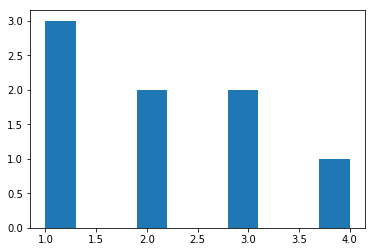

In [105]:
data = [1, 2, 1, 3, 3, 1, 4, 2]

import matplotlib.pyplot as plt
plt.hist(data)

## Making Histograms

Histogram of total minutes spent for students who passed project


(array([370., 155.,  83.,  19.,  10.,   4.,   2.,   3.,   0.,   1.]),
 array([   0.        ,  356.47332645,  712.9466529 , 1069.41997935,
        1425.8933058 , 1782.36663225, 2138.8399587 , 2495.31328515,
        2851.7866116 , 3208.25993805, 3564.7332645 ]),
 <a list of 10 Patch objects>)

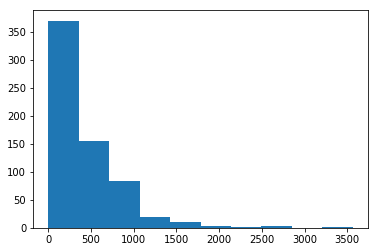

In [106]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

import matplotlib.pyplot as plt
def get_data(data, chr):
    total_m = [] 
    for value in total(data, chr).values():
        total_m += [value]
    return(total_m)

print('Histogram of total minutes spent for students who passed project')
plt.hist(get_data(dictionary, 'total_minutes_visited'))

Histogram of lessons completed for students who passed project


(array([516.,  97.,  23.,   4.,   3.,   3.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ]),
 <a list of 10 Patch objects>)

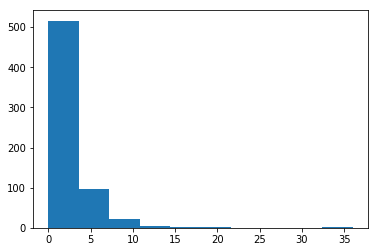

In [107]:
print('Histogram of lessons completed for students who passed project')
plt.hist(get_data(dictionary, 'lessons_completed'))

Histogram of visiting students who passed project


(array([87., 82., 79.,  0., 91., 77.,  0., 85., 78., 68.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

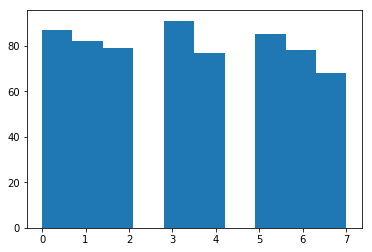

In [108]:
print('Histogram of visiting students who passed project')
plt.hist(get_data(dictionary, 'has_visited'))

Histogram of total minutes spent for students who did not pass project


(array([272.,  34.,  17.,   9.,   6.,   2.,   1.,   5.,   0.,   2.]),
 array([   0.        ,  176.85227493,  353.70454987,  530.5568248 ,
         707.40909973,  884.26137467, 1061.1136496 , 1237.96592453,
        1414.81819947, 1591.6704744 , 1768.52274933]),
 <a list of 10 Patch objects>)

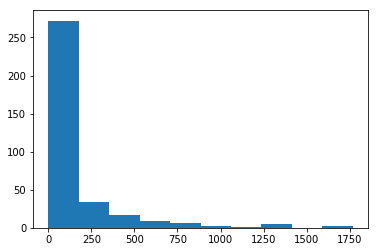

In [109]:
print('Histogram of total minutes spent for students who did not pass project')
plt.hist(get_data(dict2, 'total_minutes_visited'))

Histogram of lessons completed for students who did not pass project


(array([317.,  17.,   6.,   4.,   1.,   1.,   0.,   1.,   0.,   1.]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <a list of 10 Patch objects>)

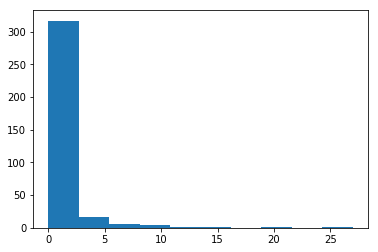

In [110]:
print('Histogram of lessons completed for students who did not pass project')
plt.hist(get_data(dict2, 'lessons_completed'))

Histogram of visiting for students who did not pass project


(array([97., 90., 56.,  0., 41., 15.,  0., 24., 17.,  8.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

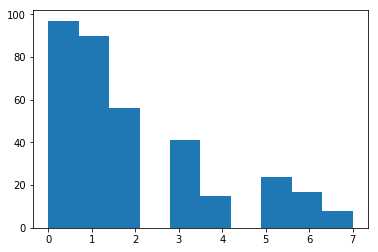

In [111]:
print('Histogram of visiting for students who did not pass project')
plt.hist(get_data(dict2, 'has_visited'))

## Improving Plots and Sharing Findings

Text(0.5, 1.0, 'Histogram of students who passed project, total minutes spent per week')

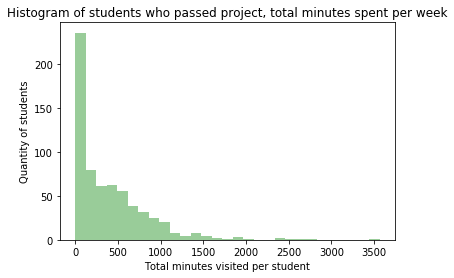

In [112]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.


import seaborn as sns
sns.distplot(get_data(dictionary, 'total_minutes_visited'), kde=False, color = 'g')
plt.xlabel('Total minutes visited per student')
plt.ylabel('Quantity of students')
plt.title('Histogram of students who passed project, total minutes spent per week')

Text(0.5, 1.0, 'Histogram of visiting students who passed project')

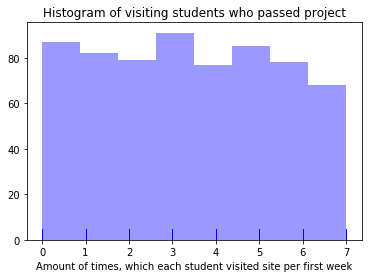

In [116]:
sns.distplot(get_data(dictionary, 'has_visited'), kde=False, rug = True, color = 'b', bins = 8)
plt.xlabel('Amount of times, which each student visited site per first week')
plt.title('Histogram of visiting students who passed project')

Text(0.5, 1.0, 'Histogram of visiting students who did not pass project')

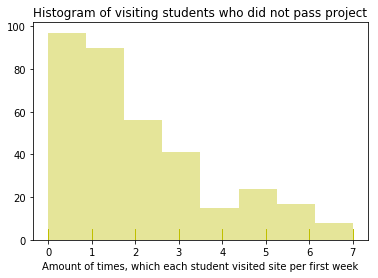

In [117]:
sns.distplot(get_data(dict2, 'has_visited'), kde=False, rug = True, color = 'y', bins = 8)
plt.xlabel('Amount of times, which each student visited site per first week')
plt.title('Histogram of visiting students who did not pass project')